<a href="https://colab.research.google.com/github/mostafa-ja/sample/blob/master/Operations_on_word_vectors_v2a_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operations on word vectors

Welcome to your first assignment of this week! 

Because word embeddings are very computationally expensive to train, most ML practitioners will load a pre-trained set of embeddings. 

**After this assignment you will be able to:**

- Load pre-trained word vectors, and measure similarity using cosine similarity
- Use word embeddings to solve word analogy problems such as Man is to Woman as King is to ______. 
- Modify word embeddings to reduce their gender bias 



Let's get started! Run the following cell to load the packages you will need.

In [ ]:
!wget 'https://raw.githubusercontent.com/mostafa-ja/coursera-deep-learning-specialization/master/C5%20-%20Sequence%20Models/Week%202/Word%20Vector%20Representation/w2v_utils.py'

In [ ]:
!wget 'https://ia803006.us.archive.org/1/items/glove.6B.50d-300d/glove.6B.50d.txt'

In [5]:
import numpy as np
from w2v_utils import *

#### Load the word vectors
* For this assignment, we will use 50-dimensional GloVe vectors to represent words. 
* Run the following cell to load the `word_to_vec_map`. 

In [6]:
words, word_to_vec_map = read_glove_vecs('/content/glove.6B.50d.txt')

In [9]:
word_to_vec_map['carlsons']

array([ 0.15493  , -0.84071  ,  0.53162  , -1.2926   ,  0.30875  ,
       -0.95806  ,  0.082767 ,  1.2005   , -0.20565  , -0.68538  ,
        0.33733  ,  0.0094586,  0.63654  ,  1.1148   , -0.53645  ,
        0.14238  , -0.16244  , -0.41831  ,  0.96385  , -0.1786   ,
       -0.54437  , -0.20289  ,  1.0179   ,  0.14958  ,  0.29966  ,
        0.71036  , -0.61929  ,  0.32007  , -0.26141  , -0.28797  ,
       -1.3356   ,  0.098339 , -0.32421  ,  0.33     , -0.20326  ,
        0.24397  ,  0.29292  ,  0.43818  , -0.58637  ,  0.2667   ,
        0.33017  , -0.31113  , -0.58068  , -0.0080464,  0.62595  ,
       -0.85231  , -0.0056409,  0.089397 , -0.81418  ,  0.06053  ])

You've loaded:
- `words`: set of words in the vocabulary.
- `word_to_vec_map`: dictionary mapping words to their GloVe vector representation.

#### Embedding vectors versus one-hot vectors
* Recall from the lesson videos that one-hot vectors do not do a good job of capturing the level of similarity between words (every one-hot vector has the same Euclidean distance from any other one-hot vector).
* Embedding vectors such as GloVe vectors provide much more useful information about the meaning of individual words. 
* Lets now see how you can use GloVe vectors to measure the similarity between two words. 

# 1 - Cosine similarity

To measure the similarity between two words, we need a way to measure the degree of similarity between two embedding vectors for the two words. Given two vectors $u$ and $v$, cosine similarity is defined as follows: 

$$\text{CosineSimilarity(u, v)} = \frac {u \cdot v} {||u||_2 ||v||_2} = cos(\theta) \tag{1}$$

* $u \cdot v$ is the dot product (or inner product) of two vectors
* $||u||_2$ is the norm (or length) of the vector $u$
* $\theta$ is the angle between $u$ and $v$. 
* The cosine similarity depends on the angle between $u$ and $v$. 
    * If $u$ and $v$ are very similar, their cosine similarity will be close to 1.
    * If they are dissimilar, the cosine similarity will take a smaller value. 

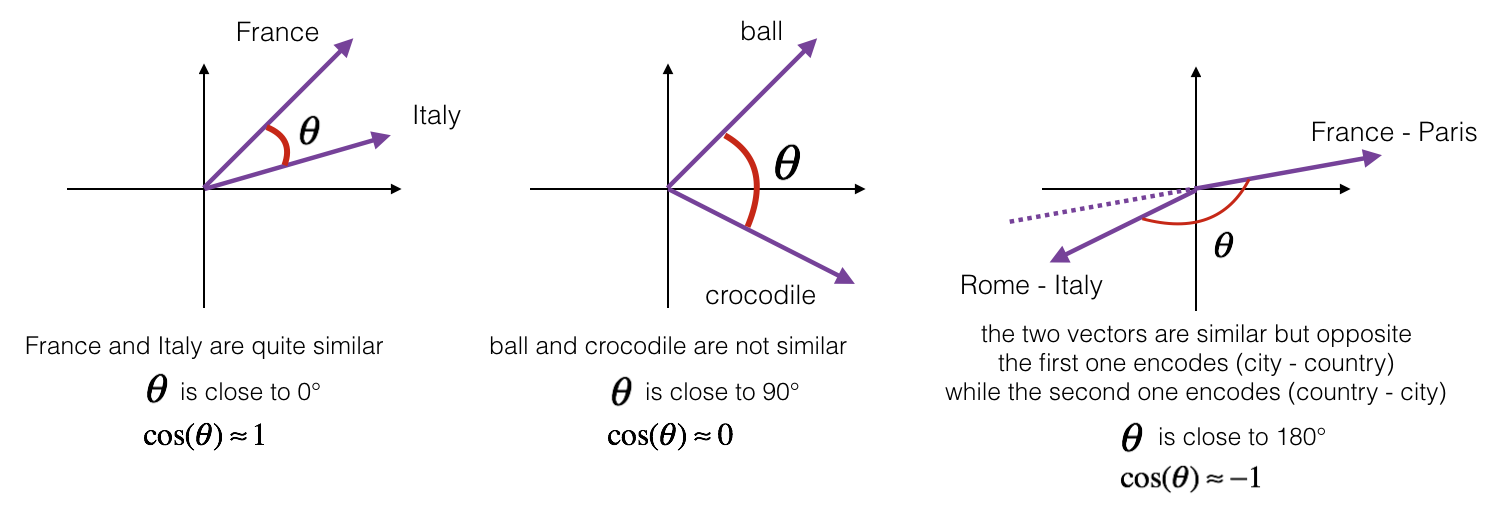
<caption><center> **Figure 1**: The cosine of the angle between two vectors is a measure their similarity</center></caption>

**Exercise**: Implement the function `cosine_similarity()` to evaluate the similarity between word vectors.

**Reminder**: The norm of $u$ is defined as $ ||u||_2 = \sqrt{\sum_{i=1}^{n} u_i^2}$

#### Additional Hints
* You may find `np.dot`, `np.sum`, or `np.sqrt` useful depending upon the implementation that you choose.

In [12]:
# GRADED FUNCTION: cosine_similarity

def cosine_similarity(u, v):
    """
    Cosine similarity reflects the degree of similarity between u and v
        
    Arguments:
        u -- a word vector of shape (n,)          
        v -- a word vector of shape (n,)

    Returns:
        cosine_similarity -- the cosine similarity between u and v defined by the formula above.
    """
    
    distance = 0.0
    
    ### START CODE HERE ###
    # Compute the dot product between u and v (≈1 line)
    dot = np.dot(u,v)
    # Compute the L2 norm of u (≈1 line)
    norm_u = np.sqrt(np.sum(u*u))
    
    # Compute the L2 norm of v (≈1 line)
    norm_v = np.sqrt(np.sum(v*v))
    # Compute the cosine similarity defined by formula (1) (≈1 line)
    cosine_similarity = dot/(norm_u*norm_v)
    ### END CODE HERE ###
    
    return cosine_similarity

In [13]:
father = word_to_vec_map["father"]
mother = word_to_vec_map["mother"]
ball = word_to_vec_map["ball"]
crocodile = word_to_vec_map["crocodile"]
france = word_to_vec_map["france"]
italy = word_to_vec_map["italy"]
paris = word_to_vec_map["paris"]
rome = word_to_vec_map["rome"]

print("cosine_similarity(father, mother) = ", cosine_similarity(father, mother))
print("cosine_similarity(ball, crocodile) = ",cosine_similarity(ball, crocodile))
print("cosine_similarity(france - paris, rome - italy) = ",cosine_similarity(france - paris, rome - italy))

cosine_similarity(father, mother) =  0.8909038442893615
cosine_similarity(ball, crocodile) =  0.2743924626137942
cosine_similarity(france - paris, rome - italy) =  -0.6751479308174201


**Expected Output**:

<table>
    <tr>
        <td>
            **cosine_similarity(father, mother)** =
        </td>
        <td>
         0.890903844289
        </td>
    </tr>
        <tr>
        <td>
            **cosine_similarity(ball, crocodile)** =
        </td>
        <td>
         0.274392462614
        </td>
    </tr>
        <tr>
        <td>
            **cosine_similarity(france - paris, rome - italy)** =
        </td>
        <td>
         -0.675147930817
        </td>
    </tr>
</table>

#### Try different words!
* After you get the correct expected output, please feel free to modify the inputs and measure the cosine similarity between other pairs of words! 
* Playing around with the cosine similarity of other inputs will give you a better sense of how word vectors behave.

## 2 - Word analogy task

* In the word analogy task, we complete the sentence:  
    <font color='brown'>"*a* is to *b* as *c* is to **____**"</font>. 

* An example is:  
    <font color='brown'> '*man* is to *woman* as *king* is to *queen*' </font>. 

* We are trying to find a word *d*, such that the associated word vectors $e_a, e_b, e_c, e_d$ are related in the following manner:   
    $e_b - e_a \approx e_d - e_c$
* We will measure the similarity between $e_b - e_a$ and $e_d - e_c$ using cosine similarity. 

**Exercise**: Complete the code below to be able to perform word analogies!

In [28]:
# GRADED FUNCTION: complete_analogy

def complete_analogy(word_a, word_b, word_c, word_to_vec_map):
    """
    Performs the word analogy task as explained above: a is to b as c is to ____. 
    
    Arguments:
    word_a -- a word, string
    word_b -- a word, string
    word_c -- a word, string
    word_to_vec_map -- dictionary that maps words to their corresponding vectors. 
    
    Returns:
    best_word --  the word such that v_b - v_a is close to v_best_word - v_c, as measured by cosine similarity
    """
    
    # convert words to lowercase
    word_a, word_b, word_c = word_a.lower(),word_b.lower(), word_c.lower()
    
    ### START CODE HERE ###
    # Get the word embeddings e_a, e_b and e_c (≈1-3 lines)
    e_a, e_b, e_c = word_to_vec_map[word_a], word_to_vec_map[word_b], word_to_vec_map[word_c]
    ### END CODE HERE ###
    
    words = word_to_vec_map.keys()
    max_cosine_sim = -100              # Initialize max_cosine_sim to a large negative number
    best_word = None                   # Initialize best_word with None, it will help keep track of the word to output

    # to avoid best_word being one of the input words, skip the input words
    # place the input words in a set for faster searching than a list
    # We will re-use this set of input words inside the for-loop
    input_words_set = set([word_a, word_b, word_c])
    
    # loop over the whole word vector set
    for w in words:        
        # to avoid best_word being one of the input words, skip the input words
        if w in input_words_set:
            continue
        
        ### START CODE HERE ###
        # Compute cosine similarity between the vector (e_b - e_a) and the vector ((w's vector representation) - e_c)  (≈1 line)
        cosine_sim = cosine_similarity(e_b-e_a, word_to_vec_map[w] - e_c)
        
        # If the cosine_sim is more than the max_cosine_sim seen so far,
            # then: set the new max_cosine_sim to the current cosine_sim and the best_word to the current word (≈3 lines)
        if cosine_sim > max_cosine_sim:
          max_cosine_sim = cosine_sim
          best_word = w
        ### END CODE HERE ###
        
    return best_word

Run the cell below to test your code, this may take 1-2 minutes.

In [29]:
triads_to_try = [('italy', 'italian', 'spain'), ('india', 'delhi', 'japan'), ('man', 'woman', 'boy'), ('small', 'smaller', 'large')]
for triad in triads_to_try:
    print ('{} -> {} :: {} -> {}'.format( *triad, complete_analogy(*triad,word_to_vec_map)))

italy -> italian :: spain -> spanish
india -> delhi :: japan -> tokyo
man -> woman :: boy -> girl
small -> smaller :: large -> larger


**Expected Output**:

<table>
    <tr>
        <td>
            **italy -> italian** ::
        </td>
        <td>
         spain -> spanish
        </td>
    </tr>
        <tr>
        <td>
            **india -> delhi** ::
        </td>
        <td>
         japan -> tokyo
        </td>
    </tr>
        <tr>
        <td>
            **man -> woman ** ::
        </td>
        <td>
         boy -> girl
        </td>
    </tr>
        <tr>
        <td>
            **small -> smaller ** ::
        </td>
        <td>
         large -> larger
        </td>
    </tr>
</table>

* Once you get the correct expected output, please feel free to modify the input cells above to test your own analogies. 
* Try to find some other analogy pairs that do work, but also find some where the algorithm doesn't give the right answer:
    * For example, you can try small->smaller as big->?.

### Congratulations!

You've come to the end of the graded portion of the assignment. Here are the main points you should remember:

- Cosine similarity is a good way to compare the similarity between pairs of word vectors.
    - Note that L2 (Euclidean) distance also works.
- For NLP applications, using a pre-trained set of word vectors is often a good way to get started.
- Even though you have finished the graded portions, we recommend you take a look at the rest of this notebook to learn about debiasing word vectors.

Congratulations on finishing the graded portions of this notebook! 


## 3 - Debiasing word vectors (OPTIONAL/UNGRADED) 

In the following exercise, you will examine gender biases that can be reflected in a word embedding, and explore algorithms for reducing the bias. In addition to learning about the topic of debiasing, this exercise will also help hone your intuition about what word vectors are doing. This section involves a bit of linear algebra, though you can probably complete it even without being an expert in linear algebra, and we encourage you to give it a shot. This portion of the notebook is optional and is not graded. 

Lets first see how the GloVe word embeddings relate to gender. You will first compute a vector $g = e_{woman}-e_{man}$, where $e_{woman}$ represents the word vector corresponding to the word *woman*, and $e_{man}$ corresponds to the word vector corresponding to the word *man*. The resulting vector $g$ roughly encodes the concept of "gender". (You might get a more accurate representation if you compute $g_1 = e_{mother}-e_{father}$, $g_2 = e_{girl}-e_{boy}$, etc. and average over them. But just using $e_{woman}-e_{man}$ will give good enough results for now.) 


In [30]:
g = word_to_vec_map['woman'] - word_to_vec_map['man']
print(g)

[-0.087144    0.2182     -0.40986    -0.03922    -0.1032      0.94165
 -0.06042     0.32988     0.46144    -0.35962     0.31102    -0.86824
  0.96006     0.01073     0.24337     0.08193    -1.02722    -0.21122
  0.695044   -0.00222     0.29106     0.5053     -0.099454    0.40445
  0.30181     0.1355     -0.0606     -0.07131    -0.19245    -0.06115
 -0.3204      0.07165    -0.13337    -0.25068714 -0.14293    -0.224957
 -0.149       0.048882    0.12191    -0.27362    -0.165476   -0.20426
  0.54376    -0.271425   -0.10245    -0.32108     0.2516     -0.33455
 -0.04371     0.01258   ]


Now, you will consider the cosine similarity of different words with $g$. Consider what a positive value of similarity means vs a negative cosine similarity. 

In [ ]:
print ('List of names and their similarities with constructed vector:')

# girls and boys name
name_list = ['john', 'marie', 'sophie', 'ronaldo', 'priya', 'rahul', 'danielle', 'reza', 'katy', 'yasmin']

for w in name_list:
    print (w, cosine_similarity(word_to_vec_map[w], g))

List of names and their similarities with constructed vector:
john -0.23163356146
marie 0.315597935396
sophie 0.318687898594
ronaldo -0.312447968503
priya 0.17632041839
rahul -0.169154710392
danielle 0.243932992163
reza -0.079304296722
katy 0.283106865957
yasmin 0.233138577679


As you can see, female first names tend to have a positive cosine similarity with our constructed vector $g$, while male first names tend to have a negative cosine similarity. This is not surprising, and the result seems acceptable. 

But let's try with some other words.

In [32]:
print('Other words and their similarities:')
word_list = ['lipstick', 'guns', 'science', 'arts', 'literature', 'warrior','doctor', 'tree', 'receptionist', 
             'technology',  'fashion', 'teacher', 'engineer', 'pilot', 'computer', 'singer']
for w in word_list:
    print (w, cosine_similarity(word_to_vec_map[w], g))

Other words and their similarities:
lipstick 0.5044872514346669
guns -0.0253491807834988
science -0.1254118783652387
arts -0.07929455897300863
literature -0.14322080639497192
warrior -0.12191622879959513
doctor 0.08248663990990857
tree 0.22618780862362534
receptionist 0.3023271239542868
technology -0.1523403238896854
fashion 0.0971807348815456
teacher 0.010802410507095376
engineer -0.32460729753080836
pilot -0.018765575812746644
computer -0.11815988794671253
singer 0.20409639147035166


Do you notice anything surprising? It is astonishing how these results reflect certain unhealthy gender stereotypes. For example, "computer" is closer to "man" while "literature" is closer to "woman". Ouch! 

We'll see below how to reduce the bias of these vectors, using an algorithm due to [Boliukbasi et al., 2016](https://arxiv.org/abs/1607.06520). Note that some word pairs such as "actor"/"actress" or "grandmother"/"grandfather" should remain gender specific, while other words such as "receptionist" or "technology" should be neutralized, i.e. not be gender-related. You will have to treat these two types of words differently when debiasing.

### 3.1 - Neutralize bias for non-gender specific words 

The figure below should help you visualize what neutralizing does. If you're using a 50-dimensional word embedding, the 50 dimensional space can be split into two parts: The bias-direction $g$, and the remaining 49 dimensions, which we'll call $g_{\perp}$. In linear algebra, we say that the 49 dimensional $g_{\perp}$ is perpendicular (or "orthogonal") to $g$, meaning it is at 90 degrees to $g$. The neutralization step takes a vector such as $e_{receptionist}$ and zeros out the component in the direction of $g$, giving us $e_{receptionist}^{debiased}$. 

Even though $g_{\perp}$ is 49 dimensional, given the limitations of what we can draw on a 2D screen, we illustrate it using a 1 dimensional axis below. 

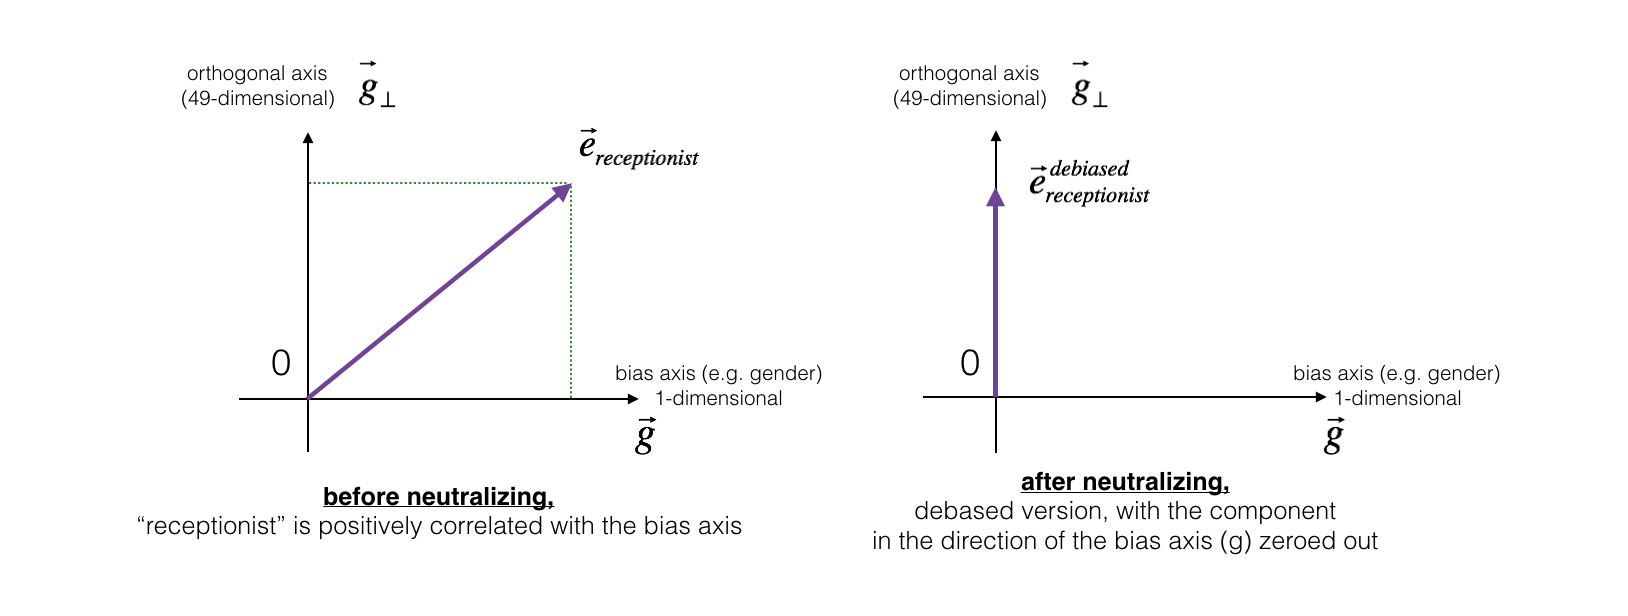
<caption><center> **Figure 2**: The word vector for "receptionist" represented before and after applying the neutralize operation. </center></caption>

**Exercise**: Implement `neutralize()` to remove the bias of words such as "receptionist" or "scientist". Given an input embedding $e$, you can use the following formulas to compute $e^{debiased}$: 

$$e^{bias\_component} = \frac{e \cdot g}{||g||_2^2} * g\tag{2}$$
$$e^{debiased} = e - e^{bias\_component}\tag{3}$$

If you are an expert in linear algebra, you may recognize $e^{bias\_component}$ as the projection of $e$ onto the direction $g$. If you're not an expert in linear algebra, don't worry about this.

<!-- 
**Reminder**: a vector $u$ can be split into two parts: its projection over a vector-axis $v_B$ and its projection over the axis orthogonal to $v$:
$$u = u_B + u_{\perp}$$
where : $u_B = $ and $ u_{\perp} = u - u_B $
!--> 

In [1]:
def neutralize(word, g, word_to_vec_map):
    """
    Removes the bias of "word" by projecting it on the space orthogonal to the bias axis. 
    This function ensures that gender neutral words are zero in the gender subspace.
    
    Arguments:
        word -- string indicating the word to debias
        g -- numpy-array of shape (50,), corresponding to the bias axis (such as gender)
        word_to_vec_map -- dictionary mapping words to their corresponding vectors.
    
    Returns:
        e_debiased -- neutralized word vector representation of the input "word"
    """
    
    ### START CODE HERE ###
    # Select word vector representation of "word". Use word_to_vec_map. (≈ 1 line)
    e = word_to_vec_map[word]
    
    # Compute e_biascomponent using the formula give above. (≈ 1 line)
    e_biascomponent = np.dot(e ,g) / np.sum(g * g) * g
 
    # Neutralize e by substracting e_biascomponent from it 
    # e_debiased should be equal to its orthogonal projection. (≈ 1 line)
    e_debiased = e - e_biascomponent
    ### END CODE HERE ###
    
    return e_debiased

In [ ]:
e = "receptionist"
print("cosine similarity between " + e + " and g, before neutralizing: ", cosine_similarity(word_to_vec_map["receptionist"], g))

e_debiased = neutralize("receptionist", g, word_to_vec_map)
print("cosine similarity between " + e + " and g, after neutralizing: ", cosine_similarity(e_debiased, g))

cosine similarity between receptionist and g, before neutralizing:  0.330779417506
cosine similarity between receptionist and g, after neutralizing:  -4.08872263257e-17


**Expected Output**: The second result is essentially 0, up to numerical rounding (on the order of $10^{-17}$).


<table>
    <tr>
        <td>
            **cosine similarity between receptionist and g, before neutralizing:** :
        </td>
        <td>
         0.330779417506
        </td>
    </tr>
        <tr>
        <td>
            **cosine similarity between receptionist and g, after neutralizing:** :
        </td>
        <td>
         -3.26732746085e-17
    </tr>
</table>

### 3.2 - Equalization algorithm for gender-specific words

Next, lets see how debiasing can also be applied to word pairs such as "actress" and "actor." Equalization is applied to pairs of words that you might want to have differ only through the gender property. As a concrete example, suppose that "actress" is closer to "babysit" than "actor." By applying neutralizing to "babysit" we can reduce the gender-stereotype associated with babysitting. But this still does not guarantee that "actor" and "actress" are equidistant from "babysit." The equalization algorithm takes care of this. 

The key idea behind equalization is to make sure that a particular pair of words are equi-distant from the 49-dimensional $g_\perp$. The equalization step also ensures that the two equalized steps are now the same distance from $e_{receptionist}^{debiased}$, or from any other work that has been neutralized. In pictures, this is how equalization works: 

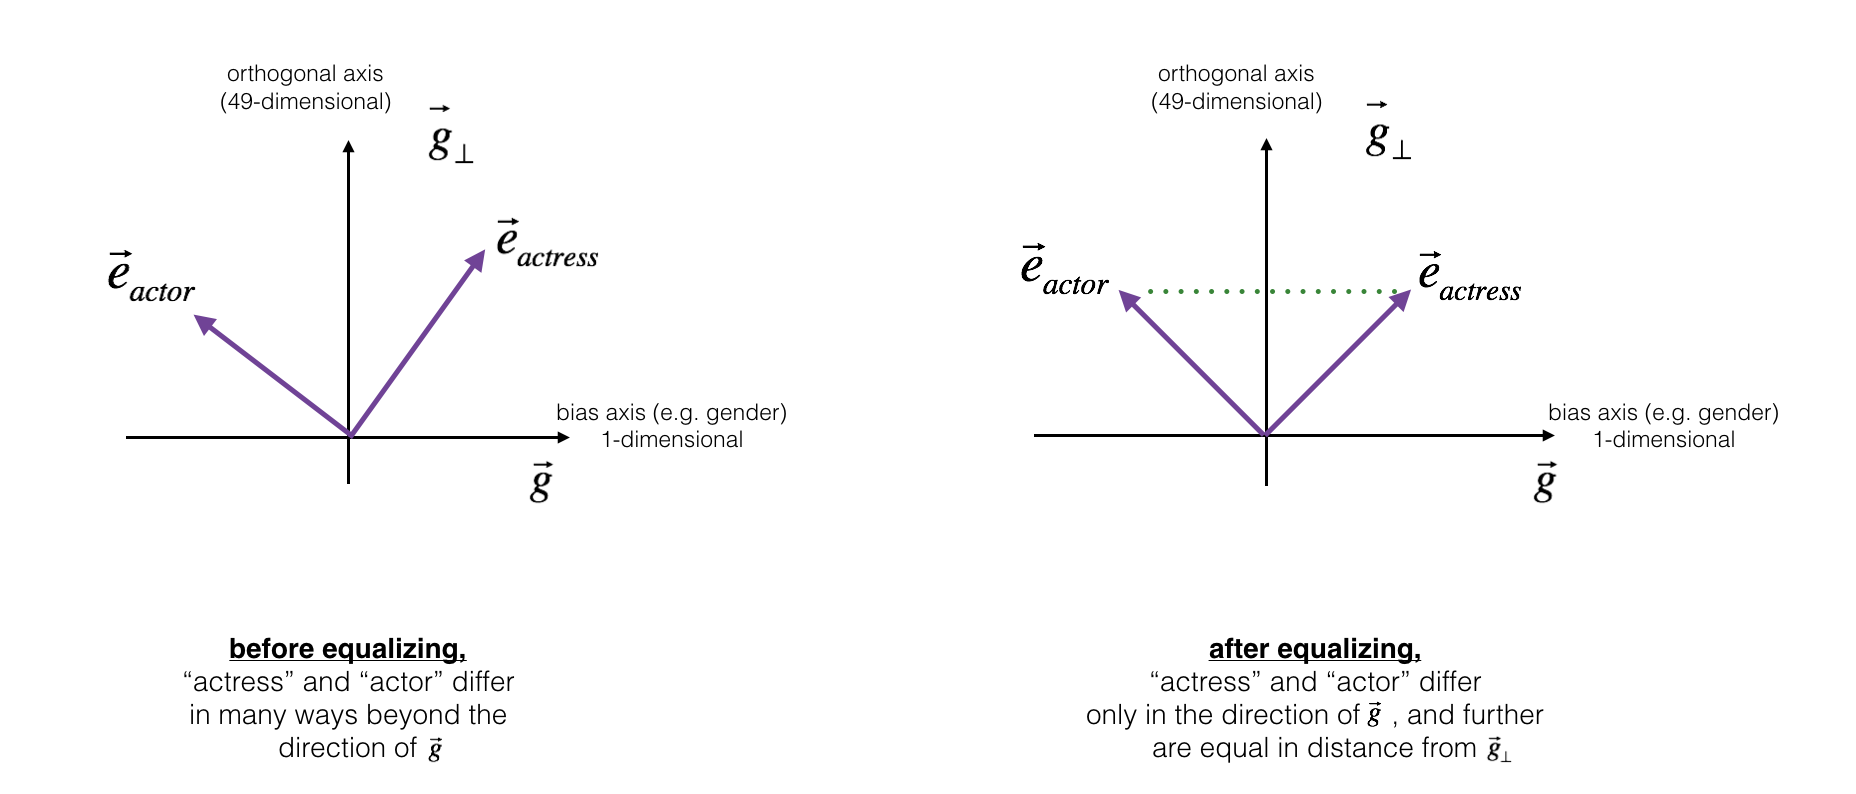

The derivation of the linear algebra to do this is a bit more complex. (See Bolukbasi et al., 2016 for details.) But the key equations are: 

$$ \mu = \frac{e_{w1} + e_{w2}}{2}\tag{4}$$ 

$$ \mu_{B} = \frac {\mu \cdot \text{bias_axis}}{||\text{bias_axis}||_2^2} *\text{bias_axis}
\tag{5}$$ 

$$\mu_{\perp} = \mu - \mu_{B} \tag{6}$$

$$ e_{w1B} = \frac {e_{w1} \cdot \text{bias_axis}}{||\text{bias_axis}||_2^2} *\text{bias_axis}
\tag{7}$$ 
$$ e_{w2B} = \frac {e_{w2} \cdot \text{bias_axis}}{||\text{bias_axis}||_2^2} *\text{bias_axis}
\tag{8}$$


$$e_{w1B}^{corrected} = \sqrt{ |{1 - ||\mu_{\perp} ||^2_2} |} * \frac{e_{\text{w1B}} - \mu_B} {||(e_{w1} - \mu_{\perp}) - \mu_B||} \tag{9}$$


$$e_{w2B}^{corrected} = \sqrt{ |{1 - ||\mu_{\perp} ||^2_2} |} * \frac{e_{\text{w2B}} - \mu_B} {||(e_{w2} - \mu_{\perp}) - \mu_B||} \tag{10}$$

$$e_1 = e_{w1B}^{corrected} + \mu_{\perp} \tag{11}$$
$$e_2 = e_{w2B}^{corrected} + \mu_{\perp} \tag{12}$$


**Exercise**: Implement the function below. Use the equations above to get the final equalized version of the pair of words. Good luck!

In [ ]:
def equalize(pair, bias_axis, word_to_vec_map):
    """
    Debias gender specific words by following the equalize method described in the figure above.
    
    Arguments:
    pair -- pair of strings of gender specific words to debias, e.g. ("actress", "actor") 
    bias_axis -- numpy-array of shape (50,), vector corresponding to the bias axis, e.g. gender
    word_to_vec_map -- dictionary mapping words to their corresponding vectors
    
    Returns
    e_1 -- word vector corresponding to the first word
    e_2 -- word vector corresponding to the second word
    """
    
    ### START CODE HERE ###
    # Step 1: Select word vector representation of "word". Use word_to_vec_map. (≈ 2 lines)
    w1, w2 = pair
    e_w1, e_w2 = word_to_vec_map[w1],word_to_vec_map[w2]
    
    # Step 2: Compute the mean of e_w1 and e_w2 (≈ 1 line)
    mu = (e_w1 + e_w2) / 2

    # Step 3: Compute the projections of mu over the bias axis and the orthogonal axis (≈ 2 lines)
    mu_B = np.dot(mu, bias_axis) / np.sum(bias_axis * bias_axis) * bias_axis
    mu_orth = mu - mu_B

    # Step 4: Use equations (7) and (8) to compute e_w1B and e_w2B (≈2 lines)
    e_w1B = np.dot(e_w1, bias_axis) / np.sum(bias_axis * bias_axis) * bias_axis
    e_w2B = np.dot(e_w2, bias_axis) / np.sum(bias_axis * bias_axis) * bias_axis
        
    # Step 5: Adjust the Bias part of e_w1B and e_w2B using the formulas (9) and (10) given above (≈2 lines)
    corrected_e_w1B = np.sqrt(np.abs(1 - np.sum(mu_orth * mu_orth))) * (e_w1B - mu_B) / np.linalg.norm(e_w1 - mu_orth - mu_B)
    corrected_e_w2B = np.sqrt(np.abs(1 - np.sum(mu_orth * mu_orth))) * (e_w2B - mu_B) / np.linalg.norm(e_w2 - mu_orth - mu_B)

    # Step 6: Debias by equalizing e1 and e2 to the sum of their corrected projections (≈2 lines)
    e1 = corrected_e_w1B + mu_orth
    e2 = corrected_e_w2B + mu_orth
                                                                
    ### END CODE HERE ###
    
    return e1, e2

In [ ]:
print("cosine similarities before equalizing:")
print("cosine_similarity(word_to_vec_map[\"man\"], gender) = ", cosine_similarity(word_to_vec_map["man"], g))
print("cosine_similarity(word_to_vec_map[\"woman\"], gender) = ", cosine_similarity(word_to_vec_map["woman"], g))
print()
e1, e2 = equalize(("man", "woman"), g, word_to_vec_map)
print("cosine similarities after equalizing:")
print("cosine_similarity(e1, gender) = ", cosine_similarity(e1, g))
print("cosine_similarity(e2, gender) = ", cosine_similarity(e2, g))

cosine similarities before equalizing:
cosine_similarity(word_to_vec_map["man"], gender) =  -0.117110957653
cosine_similarity(word_to_vec_map["woman"], gender) =  0.356666188463

cosine similarities after equalizing:
cosine_similarity(e1, gender) =  -0.700436428931
cosine_similarity(e2, gender) =  0.700436428931


**Expected Output**:

cosine similarities before equalizing:
<table>
    <tr>
        <td>
            **cosine_similarity(word_to_vec_map["man"], gender)** =
        </td>
        <td>
         -0.117110957653
        </td>
    </tr>
        <tr>
        <td>
            **cosine_similarity(word_to_vec_map["woman"], gender)** =
        </td>
        <td>
         0.356666188463
        </td>
    </tr>
</table>

cosine similarities after equalizing:
<table>
    <tr>
        <td>
            **cosine_similarity(u1, gender)** =
        </td>
        <td>
         -0.700436428931
        </td>
    </tr>
        <tr>
        <td>
            **cosine_similarity(u2, gender)** =
        </td>
        <td>
         0.700436428931
        </td>
    </tr>
</table>

Please feel free to play with the input words in the cell above, to apply equalization to other pairs of words. 

These debiasing algorithms are very helpful for reducing bias, but are not perfect and do not eliminate all traces of bias. For example, one weakness of this implementation was that the bias direction $g$ was defined using only the pair of words _woman_ and _man_. As discussed earlier, if $g$ were defined by computing $g_1 = e_{woman} - e_{man}$; $g_2 = e_{mother} - e_{father}$; $g_3 = e_{girl} - e_{boy}$; and so on and averaging over them, you would obtain a better estimate of the "gender" dimension in the 50 dimensional word embedding space. Feel free to play with such variants as well.  
                     

### Congratulations

You have come to the end of this notebook, and have seen a lot of the ways that word vectors can be used as well as  modified. 

Congratulations on finishing this notebook! 


**References**:
- The debiasing algorithm is from Bolukbasi et al., 2016, [Man is to Computer Programmer as Woman is to
Homemaker? Debiasing Word Embeddings](https://papers.nips.cc/paper/6228-man-is-to-computer-programmer-as-woman-is-to-homemaker-debiasing-word-embeddings.pdf)
- The GloVe word embeddings were due to Jeffrey Pennington, Richard Socher, and Christopher D. Manning. (https://nlp.stanford.edu/projects/glove/)
